### Section 2

2.1 Import Libraries

In [5]:
# Data wrangling
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
# Off FutureWarnings
import warnings 
warnings.filterwarnings('ignore')
#Resampling
from imblearn.over_sampling import SMOTENC 
from sklearn.utils import class_weight
#Dimension Reduction
from sklearn.decomposition import PCA
# Preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# Models Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
# Model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
# Save model
import pickle

2.2 Upload Dataframe

In [6]:
## Upload df
df = pd.read_csv('data.csv') 
pd.options.mode.chained_assignment = None
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


2.3 Check for duplicates

In [7]:
# Verify if the data has duplicate values 
data_duplicates = df.duplicated().sum() 
print("Total duplicated values: ", data_duplicates)


Total duplicated values:  0


2.4 Check for missing values

In [8]:
# Verify if the data has missing values 
data_null = df.isnull().sum().sum() 
print("Total missing values: ", data_null)


Total missing values:  0


2.5 Verify data structure

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

2.6 Describe Numeric Features

In [10]:
## Numeric features analysis 
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


2.7 Verify "Target" variable distribution

In [11]:
# Cannot do 2.7 because there is no target variable

2.8 Verify "Failure" distribution

In [12]:
## Verify the proportion of column "Failure_type" 
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

### Section 3

3.1 Rename columns

In [13]:
rename_columns = { 'UDI':'ID',
'Air temperature [K]': 'Air_temperature',
'Process temperature [K]' : 'Process_temperature', 
'Rotational speed [rpm]' : 'Rotational_speed', 
'Torque [Nm]' : 'Torque',
'Tool wear [min]' : 'Tool_wear',
'Machine failure' : 'Machine_failure'
}
df.rename(rename_columns, axis = 1, inplace = True)

3.2 Identify redundant rows

In [14]:
# Analysing redundance value, count failures on "Target" column
# count_failures = (df['Target'] == 1).sum()
# print('Number of failures:', count_failures)
# # Sum of occurrences of 'Failure_type' other than 'No Failure'
# sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['Target'] == 1), 'Failure_type'].count()
# print('Sum of failures different of "No Failure":', sum_failures)

## Have to modify this


3.3 Remove redundant rows

In [15]:
# Filter the rows with has 1 in the column "Target" and 'No Failure' in the column 'Failure_type' rows_to_remove = df[(df['Target'] == 1) & (df['Failure_type'] == 'No Failure')]
# Remove this filtered row in the main df
# df.drop(rows_to_remove.index, inplace=True)

# Have to modify this

3.4 Remove unecessary columns

In [16]:
df.columns

Index(['ID', 'Product ID', 'Type', 'Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear', 'Machine_failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [17]:
#Removing unnecessary columnds
drop_columns = ["ID", "Product ID"] 
df.drop(drop_columns, axis = 1, inplace = True)

3.5 Remove Random Failures

3.6 Rename "type"

In [21]:
rename_type = {
    'L':'Low',
    'M':'Medium',
    'H':'High'
}
df['Type'].replace(rename_type, inplace = True)

3.7 Plot the "type" distribtution

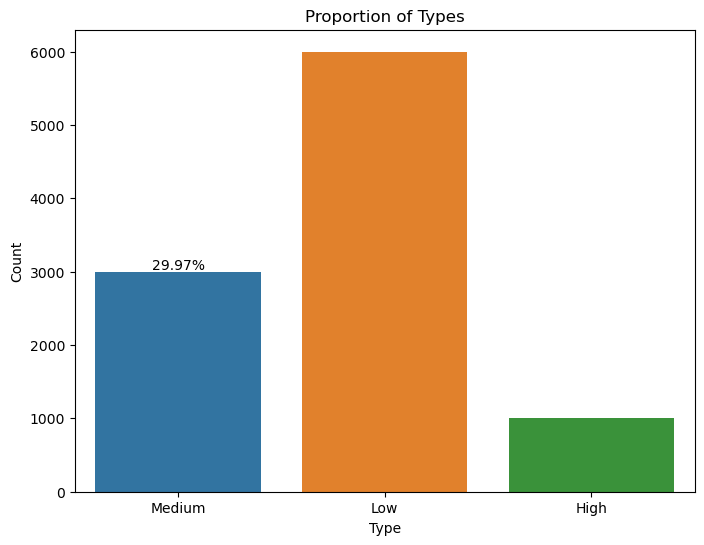

In [23]:
# Count types
tipo_contagem = df['Type'].value_counts()
# Show graphic
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Type') 
plt.title('Proportion of Types') 
plt.xlabel('Type') 
plt.ylabel('Count')
# Add as percentages as labels 
total = len(df['Type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
    plt.show()

3.8 Plot Failure Type distribution

3.9 Plot histogram

In [28]:
df.columns

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [26]:
NUMERIC_FEATURES = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
CATEGORIC_FEATURES = ['Type']

3.12 Scale and encode

In [27]:
# Create preprocessor ColumnTransformer to do OneHotEncoder for CATEGORIC_FEATURES and StandardScaler() for NUMERIC_FEATURES
# Define the pipelines for numeric and categorical transformations
num_pipeline = Pipeline([
    ('num_features', StandardScaler()) 
    ])
cat_pipeline = Pipeline([ 
    ('cat_features', OneHotEncoder())
    ])
# Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_pipeline, NUMERIC_FEATURES),
    ('cat_trans', cat_pipeline, CATEGORIC_FEATURES) ])
# Fit and transform the data
df_transformed = preprocessor.fit_transform(df)
# Converting the transformed data back to a dataframe for easier visualization
# The transformed data will have new column names, especially for the one hot encoded categories 
encoded_feature_names = preprocessor.named_transformers_['cat_trans'].get_feature_names_out(CATEGORIC_FEATURES) 
new_column_names = list(NUMERIC_FEATURES) + list(encoded_feature_names)
df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)
df_transformed.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_High,Type_Low,Type_Medium
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.0,0.0,1.0
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.0,1.0,0.0
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.0,0.0
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0.0,1.0,0.0
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0.0,1.0,0.0


3.13 PCA Analysis

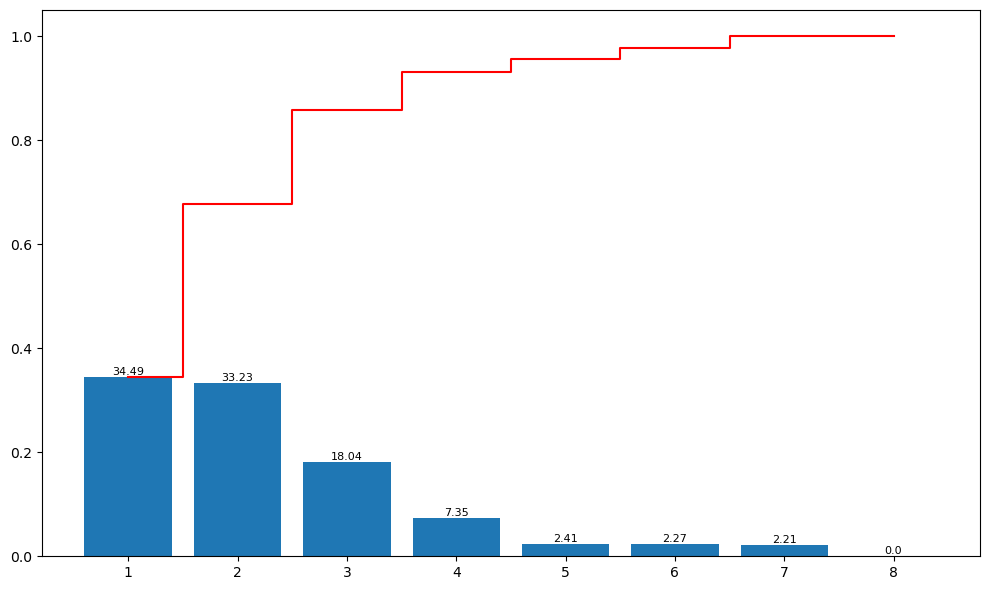

In [29]:
# Define PCA function
pca = PCA()
pca.fit(df_transformed) # Assumindo que df_transformed é o seu DataFrame transformado

# PCA variance explained
exp_var = pca.explained_variance_ratio_ 
cum_exp_var = exp_var.cumsum()

# Number of components 
n_pca_components = len(exp_var)

# Create the graphic
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, n_pca_components + 1), exp_var, align='center', label='Individual explained variance') 
plt.step(range(1, n_pca_components + 1), cum_exp_var, where='mid', label='Cumulative explained variance', color='red')

# Add labels in each bar 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), va='bottom', ha='center', fontsize=8)

# Adjust others elements of the graphic plt.ylabel('Explained variance percentage') plt.xlabel('Principal component index') plt.xticks(ticks=list(range(1, n_pca_components + 1))) plt.title('PCA Explained Variance') plt.legend(loc='best')
plt.tight_layout() 
plt.show()

In [30]:
#Consider using 5 componenets.. above 95% is good
cum_exp_var

array([0.34489681, 0.67718084, 0.85761399, 0.93111956, 0.9551817 ,
       0.97789025, 1.        , 1.        ])

3.14 Understanding PCA components

In [20]:
#mihir is gay